In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# AR model
- 자기 회귀 모델
- 과거의 데이터를 선형회귀해서 미래를 예측하는 모델

In [ ]:
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/hare.dat'

df=  pd.read_csv(path)

In [ ]:
# 1905년 부터 1935년 까지의 각 년도(Anualy) 첫째날(Start) 을 생성 후 인덱스에 대입
# freq="AS" : Anualy Start
df.index = pd.date_range("1905","1935", freq="AS")

# 컬럼추가
df["pred"] = 0

# 1925년 1월 1일 까지의 hare 컬럼을 조회해서 pred컬럼의 1925년 1월1일까지에 대입
df.loc[ : "1925-01-01", "pred"] = df.loc[: '1925-01-01',"hare"]

## 예측

In [ ]:
# 1925년 1월 1일까지의 pred컬럼의 값을 이용해서 이후 ㅋ토끼의 수 예측할 ARMA객체 생성
arma = ARMA(df.loc[:'1925-01-01', "pred"], (1,0))
# 1925년 1월1일까지의 pred컬럼의 값 분석
result = arma.fit()
# 데이터 출력
# 회귀분석 결과 확인
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -88.577
Method:                       css-mle   S.D. of innovations             16.183
Date:                Wed, 01 Sep 2021   AIC                            183.153
Time:                        08:29:50   BIC                            186.287
Sample:                    01-01-1905   HQIC                           183.833
                         - 01-01-1925                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2223     10.206      4.137      0.001      22.220      62.225
ar.L1.pred     0.6846      0.148      4.616      0.000       0.394       0.975
                                    Roots           

In [ ]:
# 1925년 1월 1일까지의 pred컬럼의 값을 분석한 결과를 이용하여 
# 1926년 1월 1일부터 1936년 1월1일까지의 토끼의 수를 예측
pred = result.predict(start='1926-01-01', end='1935-01-01')
pred

1926-01-01    31.115865
1927-01-01    34.618389
1928-01-01    37.016355
1929-01-01    38.658098
1930-01-01    39.782101
1931-01-01    40.551637
1932-01-01    41.078492
1933-01-01    41.439198
1934-01-01    41.686152
1935-01-01    41.855226
Freq: AS-JAN, dtype: float64

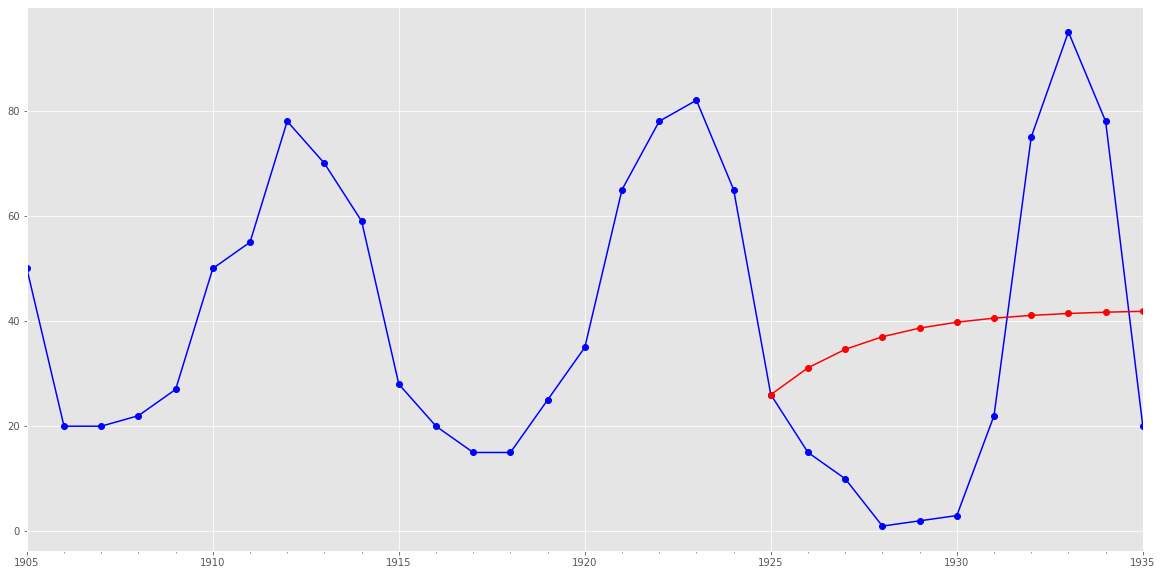

In [ ]:
# 예측한 토끼의 수 (pred 변수에 저장)를 df의 1926년 1월1일 행부터의 pred 컬럼에 추가
df.loc["1926-01-01":,"pred"]=pred

plt.style.use("ggplot")
plt.figure(figsize=(20,10))
# 실제 토끼의 수가 저장된 hare 컬럼 시각화
df.loc[ : , "hare"].plot(color="b", marker='o')
# 예측한 값이 저장된 pred 컬럼의 1925년1월1일 부터 예측값 시각화
df.loc["1925-01-01": , "pred"].plot(color="r", marker='o')

# 시계열 데이터 예측 성능 측정
MSE (Mean Squred Error) = (진짜 - 예측)^ 합 / 데이터수

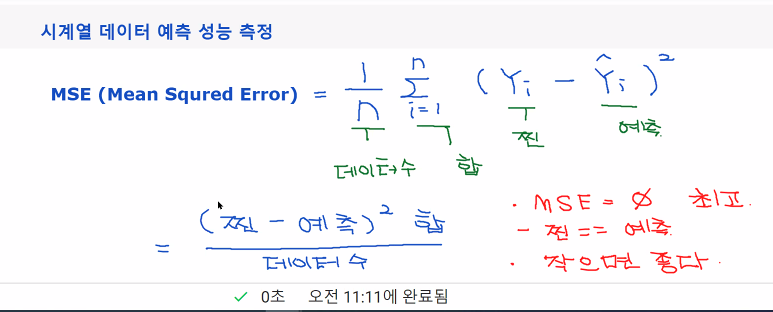

In [ ]:
# 1925년 1월1일 부터 모든 칸조회
# 진짜(hare) - 예측(pred) = 오차(rasidual)
df.loc["1926-01-01": , ]

# 오차 = 진짜 - 예측
cost = df.loc["1926-01-01": , "hare" ] - df.loc["1926-01-01": , "pred" ]
cost

# 오차 컬럼에 대입
df.loc["1926-01-01": , "오차"] = cost 
df

,hare,pred,오차
1905-01-01,50,50.000000,NaN
1906-01-01,20,20.000000,NaN
1907-01-01,20,20.000000,NaN
1908-01-01,22,22.000000,NaN
1909-01-01,27,27.000000,NaN
1910-01-01,50,50.000000,NaN
1911-01-01,55,55.000000,NaN
1912-01-01,78,78.000000,NaN
1913-01-01,70,70.000000,NaN
1914-01-01,59,59.000000,NaN


In [ ]:
# MSE 계산

# (진짜 - 예측)^
print("(진짜 - 예측)^ :" , df.loc["1926-01-01": , "오차"] ** 2)
print("="*30)

# (진짜 - 예측)^의 합
print("합 : ", (df.loc["1926-01-01": , "오차"] ** 2).sum())
print("="*30)

# 데이터의 수 = n
print('데이터의 수 n :', len( df.loc["1926-01-01": , "오차"]  ))
print("="*30)

# (진짜 - 예측)^ 합 / 데이터수
print("mse : ",(df.loc["1926-01-01": , "오차"] ** 2).sum() / len(df.loc["1926-01-01": , "오차"]))
print("="*30)

(진짜 - 예측)^ : 1926-01-01     259.721096
1927-01-01     606.065053
1928-01-01    1297.177838
1929-01-01    1343.816161
1930-01-01    1352.922918
1931-01-01     344.163238
1932-01-01    1150.668684
1933-01-01    2868.759480
1934-01-01    1318.695564
1935-01-01     477.650909
Freq: AS-JAN, Name: 오차, dtype: float64
합 :  11019.640942083002
데이터의 수 n : 10
mse :  1101.9640942083001


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# MSE
mean_squared_error(df.loc["1926-01-01": , "hare" ] , df.loc["1926-01-01": , "pred" ])

1101.9640942083001

# AR 2

In [ ]:
# 25년 1월 1일 까지 pred
df.loc[ : "1925-01-01","pred"]

# ARMA(진짜 값, (p,g))
# p : 과거 데이터 p개
# g : 몇개의 데이터 MA(moving average) 
# ar+moving avarage~ = arma~
# 25년 1월 1일 까지 pred 컬럼 값 이용해서 이후 토끼의 수 예측할 ARMA객체 생성
arma = ARMA(df.loc[ : "1925-01-01","pred"],(2, 0)) 

# 25년 1월 1일 까지 pred 분석
result = arma.fit()
result.summary()
print( result.summary() )

                              ARMA Model Results                              
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(2, 0)   Log Likelihood                 -82.514
Method:                       css-mle   S.D. of innovations             11.603
Date:                Wed, 01 Sep 2021   AIC                            173.029
Time:                        08:29:50   BIC                            177.207
Sample:                    01-01-1905   HQIC                           173.935
                         - 01-01-1925                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.6210      5.501      7.747      0.000      31.838      53.404
ar.L1.pred     1.2870      0.164      7.827      0.000       0.965       1.609
ar.L2.pred    -0.7587      0.156     -4.863      0.0

## 예측

In [ ]:
# 예측
prediction = result.predict(start="1926-01-01", end="1935-01-01")

# 예측값 pred 컬럼 추가, 대입
df.loc["1926-01-01": ,"pred"] = prediction
df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"]
cost = df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"]
df.loc["1926-01-01":  ,"residual"] = cost

In [ ]:
df.loc["1926-01-01": ,"residual"] ** 2

( df.loc["1926-01-01": ,"residual"] ** 2 ).sum()

( df.loc["1926-01-01": ,"residual"] ** 2 ).sum() /10

# MSE
mean_squared_error(df.loc["1926-01-01": ,"hare"], df.loc["1926-01-01": ,"pred"])

1318.9146319339857

AR 1이 오차가 더 적어 2 보다 정확하다

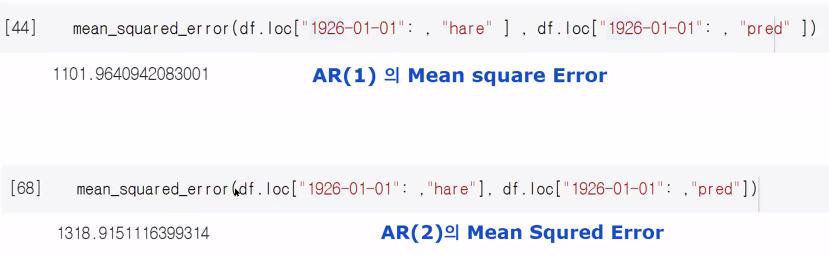

# AR 3

In [ ]:
# 3 = p : 3개의 이전 데이터 활용
# 0 : 평균 안쓸거임 0
# 객체생성
arma = ARMA(df.loc[ :'1925-01-01',"pred"],(3,0))

result=arma.fit()
print(result.summary())

# 예측
prediction = result.predict(start = "1926-01-01", end = "1935-01-01")

df.loc["1926-01-01": , "pred"] = prediction

df.loc["1926-01-01": , "residual"]=df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"] 


# MSE
print("MSE : ", mean_squared_error(df.loc['1926-01-01' : ,"hare"], df.loc["1926-01-01": , "pred"]))


                              ARMA Model Results                              
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(3, 0)   Log Likelihood                 -90.255
Method:                       css-mle   S.D. of innovations              8.159
Date:                Wed, 01 Sep 2021   AIC                            190.510
Time:                        08:29:51   BIC                            195.733
Sample:                    01-01-1905   HQIC                           191.644
                         - 01-01-1925                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6043        nan        nan        nan         nan         nan
ar.L1.pred     0.8958   4.75e-06   1.88e+05      0.000       0.896       0.896
ar.L2.pred     0.0587   3.98e-07   1.47e+05      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


# ARIMA

In [ ]:
import itertools

In [ ]:
p = range(1, 11)

In [ ]:
q = [0]
d = [0]

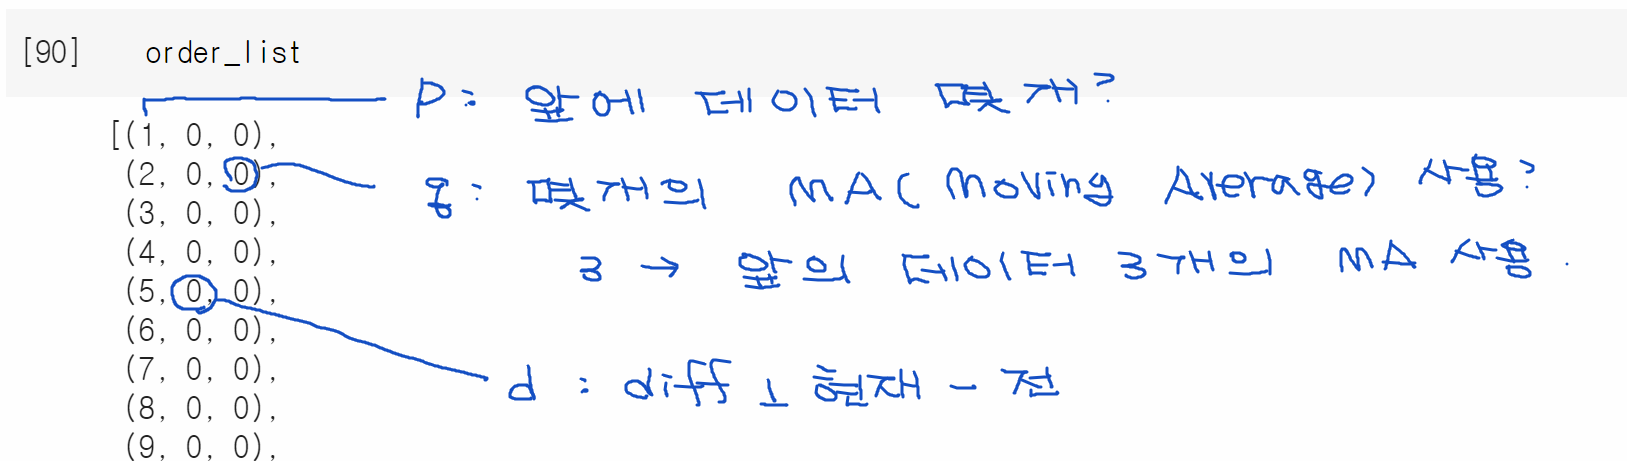

In [ ]:
order_list = list( itertools.product(p,d,q) )
order_list

[(1, 0, 0),
 (2, 0, 0),
 (3, 0, 0),
 (4, 0, 0),
 (5, 0, 0),
 (6, 0, 0),
 (7, 0, 0),
 (8, 0, 0),
 (9, 0, 0),
 (10, 0, 0)]